In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the dataset

In [489]:
from sklearn.datasets import fetch_california_housing

In [490]:
california = fetch_california_housing()

In [491]:
type(california)

sklearn.utils._bunch.Bunch

In [492]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

## Lets check the description of the dataset

In [493]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [494]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [495]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [496]:
print(california.target_names)

['MedHouseVal']


In [497]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Preparing the Dataset

In [498]:
dataset = pd.DataFrame(california.data,columns=california.feature_names)

In [499]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [500]:
dataset['MedHouseVal'] = california.target

In [501]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [502]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Summarizing the stats of the data

In [503]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Check Missing Values

In [504]:
dataset.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## EDA(Exploratry Data Analysis)

### Univariate Analysis

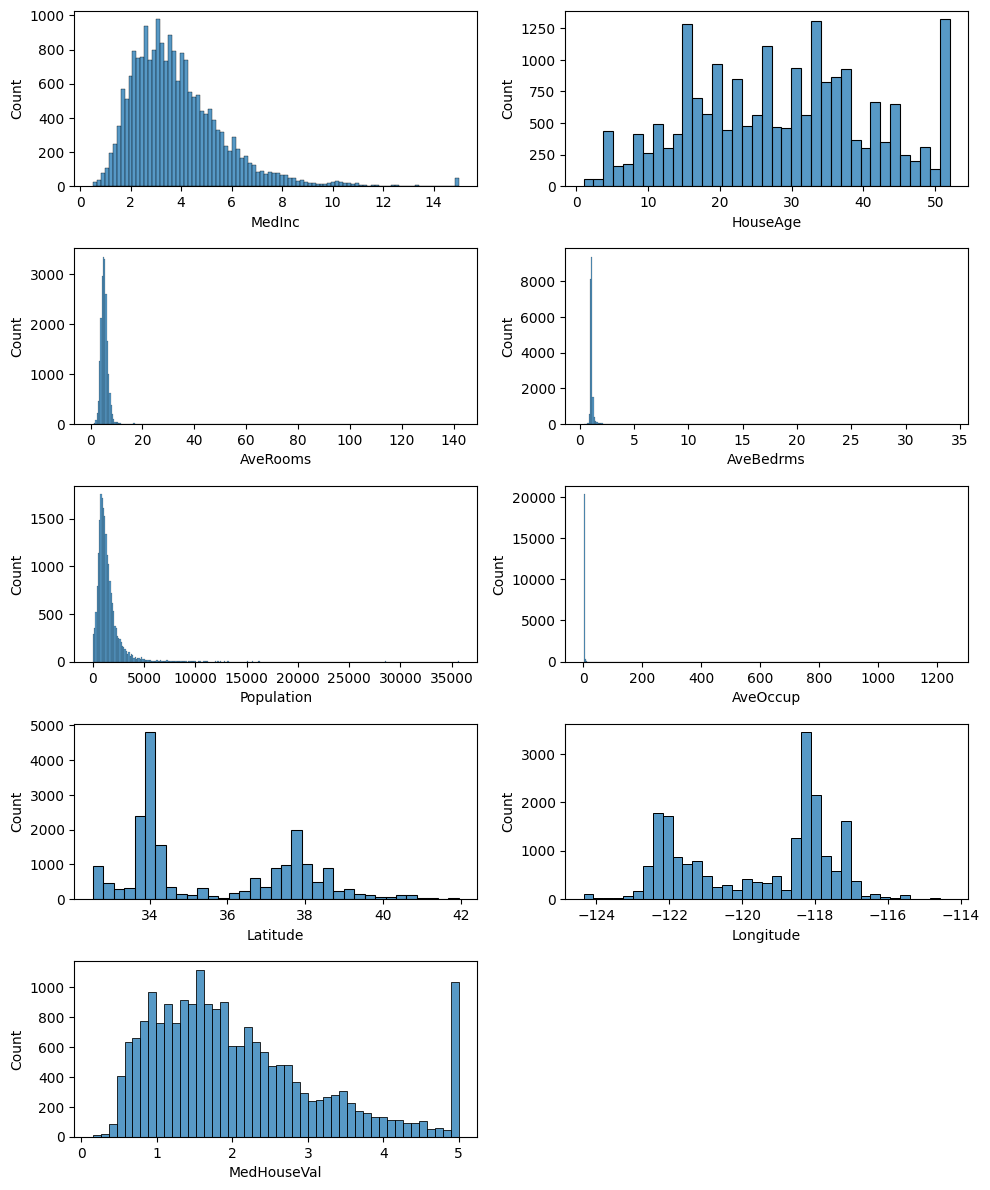

In [505]:
plt.figure(figsize=(10,12))
for i in range(0,len(dataset.columns)):
    plt.subplot(5,2,i+1)
    sns.histplot(data=dataset,x=dataset.columns[i])
    plt.tight_layout()

### Multivariate Analysis

In [506]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

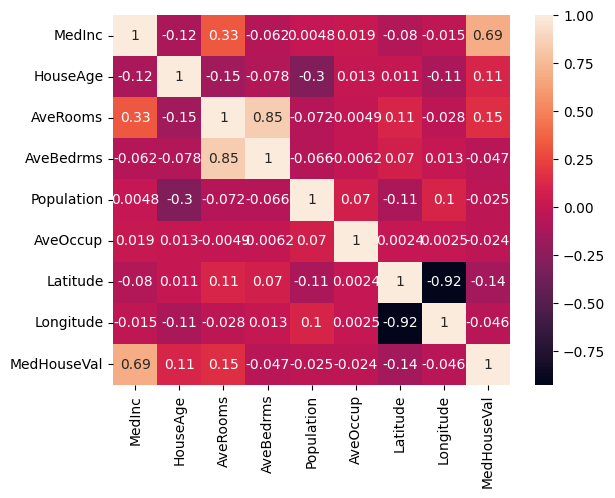

In [507]:
sns.heatmap(data=dataset.corr(),annot=True)

### Bivariate Analysis

Text(0, 0.5, 'MedHouseVal')

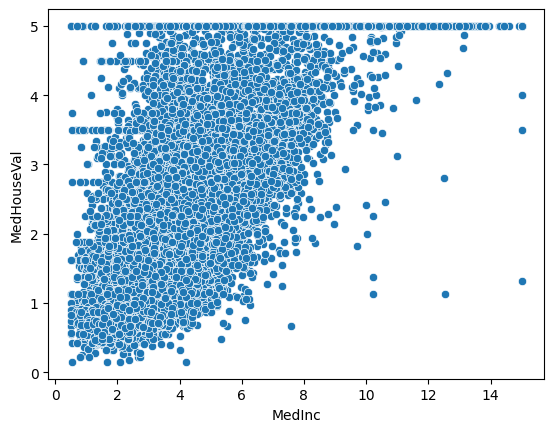

In [508]:
sns.scatterplot(x=dataset["MedInc"],y=dataset['MedHouseVal'])
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

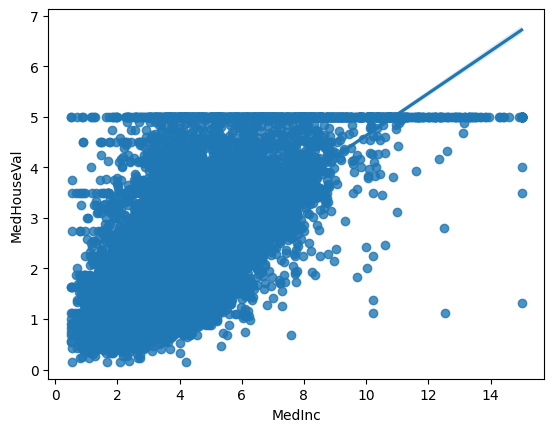

In [509]:
sns.regplot(data=dataset,x="MedInc",y="MedHouseVal")

Text(0, 0.5, 'MedHouseVal')

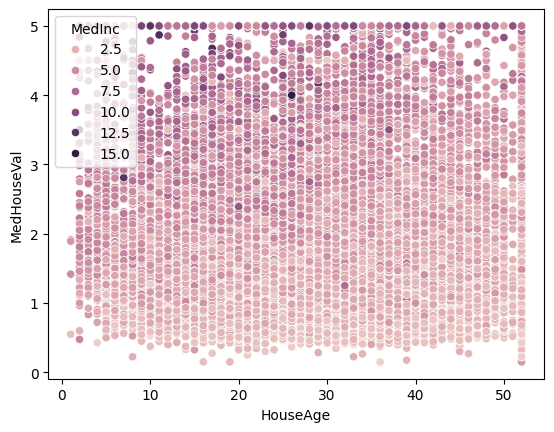

In [510]:
sns.scatterplot(x=dataset["HouseAge"],y=dataset['MedHouseVal'],hue=dataset['MedInc'])
plt.xlabel("HouseAge")
plt.ylabel("MedHouseVal")

**This shows if income affects the price trend with house age.**

<Axes: xlabel='Population', ylabel='MedHouseVal'>

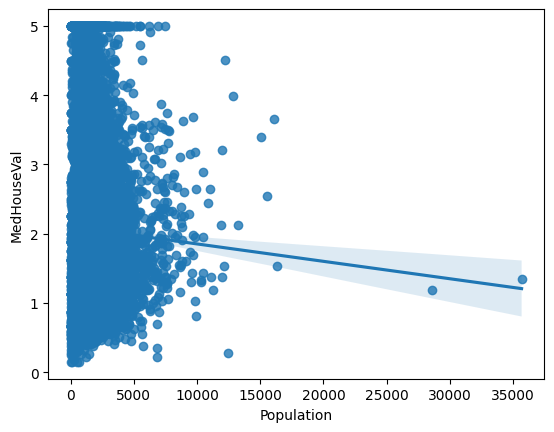

In [511]:
# LEss corelated
sns.regplot(data=dataset,x="Population",y="MedHouseVal")

In [512]:
if dataset.columns[i] != 'MedHouseVal':
    sns.scatterplot(data=dataset, x=dataset.columns[i], y='MedHouseVal')

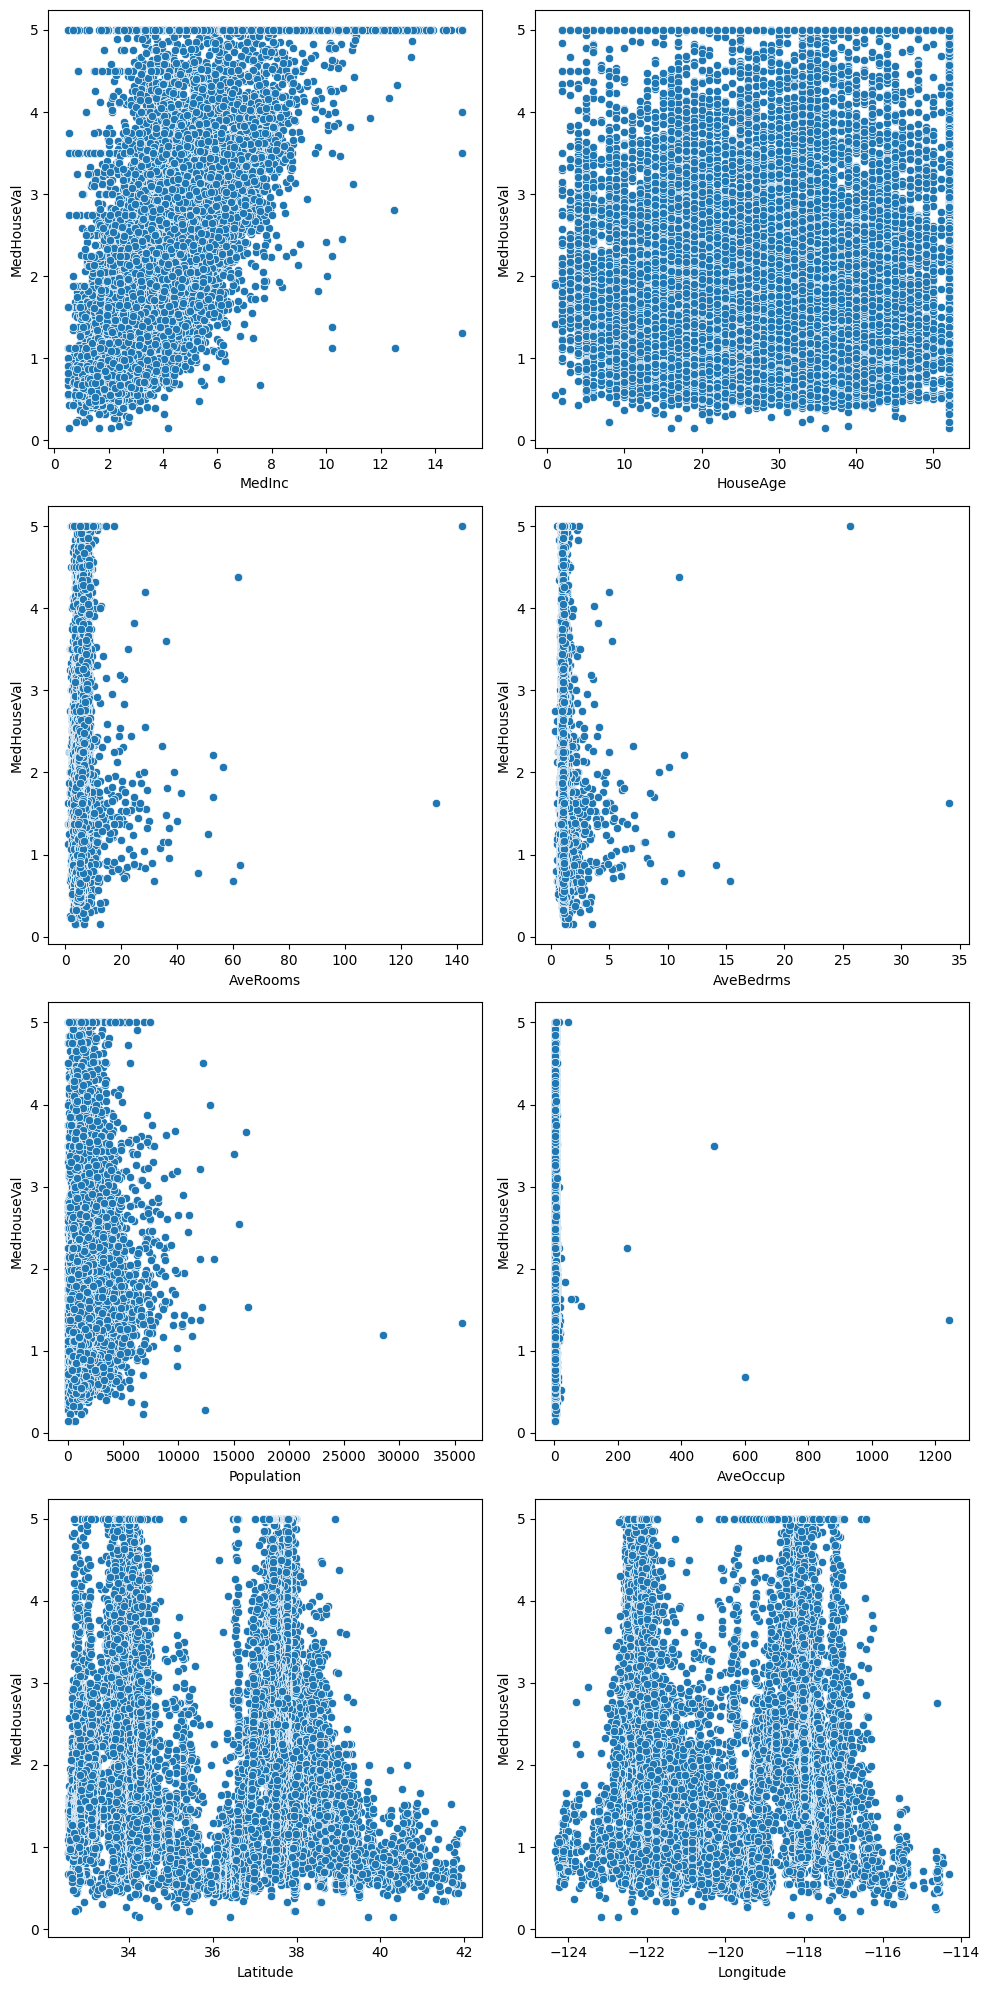

In [513]:
plt.figure(figsize=(10,20))
for i in range(0,len(dataset.columns)):
    if dataset.columns[i] != 'MedHouseVal':
        ax = plt.subplot(4,2,i+1) 
        sns.scatterplot(data=dataset, x=dataset.columns[i], y='MedHouseVal')
        plt.tight_layout()

## Independent and Dependent Features

In [514]:
X = dataset.iloc[:,:-1]  ## This gives all the features instead of last one that is dependent
y = dataset['MedHouseVal']

In [515]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [516]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

## Train Test Spilit

In [517]:
from sklearn.model_selection import train_test_split

In [518]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [519]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


## Standardizing the dataset

In [520]:
from sklearn.preprocessing import StandardScaler

In [521]:
scaler = StandardScaler()

In [522]:
X_train = scaler.fit_transform(X_train)

In [523]:
'''-Training data → we “learn the rules” (mean, std).
   -Test data → we do not want to change the rules, we just apply them.'''

'-Training data → we “learn the rules” (mean, std).\n   -Test data → we do not want to change the rules, we just apply them.'

In [524]:
X_test = scaler.transform(X_test)   
'''We want the model to be “blind” to the test data.
    If you call fit on the test set:
-You compute new statistics (mean/std) from test data.
-This leaks information from the test set into preprocessing.
-Your evaluation becomes biased → not a true reflection of model performance.'''

'We want the model to be “blind” to the test data.\n    If you call fit on the test set:\n-You compute new statistics (mean/std) from test data.\n-This leaks information from the test set into preprocessing.\n-Your evaluation becomes biased → not a true reflection of model performance.'

In [525]:
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]], shape=(14448, 8))

## Model Training

In [526]:
from sklearn.linear_model import LinearRegression 

In [527]:
regression = LinearRegression()

In [528]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Print the Coefficients and the intercepts

In [529]:
print(regression.coef_)
#It tells how much the target (MedHouseVal) changes if that feature increases by 1 unit, keeping other features constant.

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [530]:
print(regression.intercept_)
#Intercept = starting point of prediction or it gives the baseline.

2.06923960894241


In [531]:
## On which parameters the model is trained?
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

### Prediction With Test data

Predicted House Price =  intercept + (coefficients × features)

In [532]:
reg_pred = regression.predict(X_test)

In [533]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133], shape=(6192,))

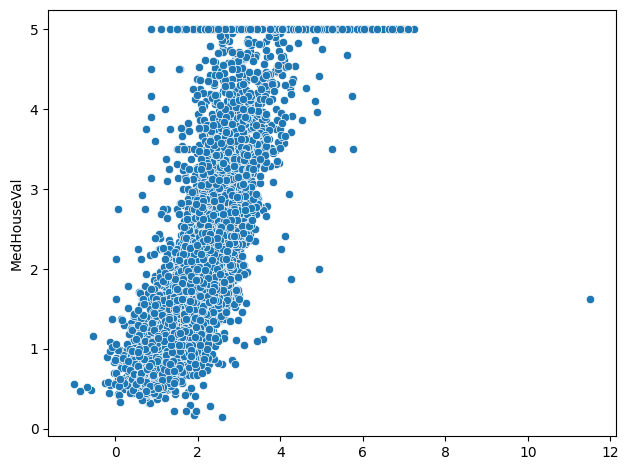

In [534]:
## Plot a scatter plot for the prediction
sns.scatterplot(x=reg_pred,y=y_test)
plt.tight_layout()

**Here we can see plotting is quiet linear that means your model has performed well.**

### Calculating residuals(i.e error)

In [535]:
residual = y_test-reg_pred 
## Difference b/w actual and predicted value

In [536]:
residual

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: MedHouseVal, Length: 6192, dtype: float64

<Axes: xlabel='MedHouseVal', ylabel='Density'>

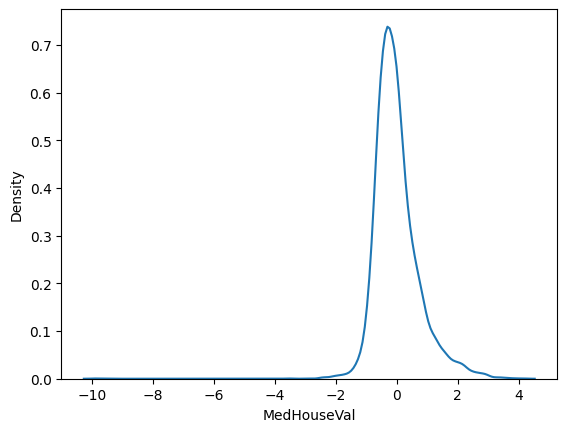

In [537]:
## Plot the residuals

sns.kdeplot(residual)

**There are a few residuals far from zero on the left side (negative) too, indicating some overpredictions.**

**A normal-shaped (bell curve) KDE around zero usually means the model errors are well-behaved.**

**If the distribution was skewed or very wide, it might suggest the model is biased or missing some important information.**

In [538]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f"Mean Absolute Error: {mean_absolute_error(y_test,reg_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,reg_pred)}")
print(f"Root Mean Square Error: {np.sqrt(mean_squared_error(y_test,reg_pred))}")

Mean Absolute Error: 0.5272474538305951
Mean Squared Error: 0.5305677824766752
Root Mean Square Error: 0.7284008391515452


## R square and Adjusted R square

**R^2 = SSR/SST**

where:

SSR: Residual Sum of Squares(unexplained variance)

SST: Total Sum of Squares(total Variance)

In [539]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(f"R2 Score : {score}")

R2 Score : 0.5957702326061665


**Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]**

where:
R2: R Square

n: The number of data points 
 
k: The number of predictors variables(features).

In [540]:
adjusted_score = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f"Adjusted R2 score: {adjusted_score}")

Adjusted R2 score: 0.5952472117200027


## Model Regularization

In [541]:
from sklearn.linear_model import Ridge,Lasso


In [542]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [543]:
ridge_pred = ridge.predict(X_test)

In [544]:
ridge_r2 = r2_score(y_test,ridge_pred)
print(f"Ridge R2 Score: {ridge_r2}")

Ridge R2 Score: 0.5957885548359448


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Try several alpha values
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

print("Best alpha for Ridge:", ridge_cv.best_params_)
print("Best CV R²:", ridge_cv.best_score_)

best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
print("Test R²:", r2_score(y_test, y_pred_ridge))


Best alpha for Ridge: {'alpha': np.float64(3.4304692863149193)}
Best CV R²: 0.6065877502943071
Test R²: 0.5958322067314825


## New Data Prediction

In [553]:
california.data[0].shape

(8,)

In [ ]:
california.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [567]:
## Transformation of new data
scaler.transform(california.data[0].reshape(1,-1))

c:\Users\harsh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

In [580]:
regression.predict(scaler.transform(california.data[0].reshape(1,-1)))

c:\Users\harsh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])

**The model Prediction of the house's Median value is approximately:**
**4.14 x 100,000 = $414,000**

## Pickling The Model File For Deployment

In [577]:
import pickle

In [578]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [579]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [583]:
# prediction
pickled_model.predict(scaler.transform(california.data[0].reshape(1,-1)))

c:\Users\harsh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])